In [173]:
# !pip install statsmodels
# !pip install cv2


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [208]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller 
from numpy import log 
import pandas as pd 
pd.options.mode.chained_assignment = None 

In [143]:
VW = pd.read_csv('VW01012019-060922.csv', dayfirst=True)
VW.head()

,Date,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,06.11.2022 09:00,-2.5,755.6,772.1,0.1,84.0,"Ветер, дующий с юго-запада",2.0,NaN,NaN,...,"Высококучевые просвечивающие, полосами, либо о...",NaN,10.0,-4.8,NaN,NaN,NaN,NaN,NaN,NaN
1,06.11.2022 06:00,-2.5,755.5,772.0,0.0,83.0,"Ветер, дующий с западо-северо-запада",2.0,NaN,NaN,...,NaN,NaN,10.0,-5.0,Осадков нет,12.0,NaN,NaN,NaN,NaN
2,06.11.2022 03:00,-1.9,755.5,772.0,0.1,81.0,"Ветер, дующий с запада",1.0,NaN,NaN,...,NaN,NaN,10.0,-4.7,NaN,NaN,NaN,NaN,NaN,NaN
3,06.11.2022 00:00,-1.8,755.4,771.8,0.9,80.0,"Ветер, дующий с запада",2.0,NaN,NaN,...,NaN,NaN,10.0,-4.8,NaN,NaN,NaN,NaN,NaN,NaN
4,05.11.2022 21:00,-1.4,754.5,770.9,0.5,79.0,"Ветер, дующий с северо-запада",3.0,NaN,NaN,...,NaN,NaN,10.0,-4.7,NaN,NaN,NaN,NaN,NaN,NaN


In [290]:
from collections import Counter
df = VW[['Date','Po','T', 'P']]

df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%d.%m.%y %H:%M')
#print(df['Date'])

df['Date'] = pd.to_datetime(df['Date'])
#print(df['Date'])

df['year'] = df["Date"].dt.year
df['month'] = df['Date'].dt.month_name()
df['day'] = df['Date'].dt.day
df['month'].value_counts()

df

,Date,Po,T,P,year,month,day
0,2022-11-06 09:00:00,755.6,-2.5,772.1,2022,November,6
1,2022-11-06 06:00:00,755.5,-2.5,772.0,2022,November,6
2,2022-11-06 03:00:00,755.5,-1.9,772.0,2022,November,6
3,2022-11-06 00:00:00,755.4,-1.8,771.8,2022,November,6
4,2022-11-05 21:00:00,754.5,-1.4,770.9,2022,November,5
...,...,...,...,...,...,...,...
11231,2019-01-01 12:00:00,747.7,-7.9,764.3,2019,January,1
11232,2019-01-01 09:00:00,750.1,-10.0,766.9,2019,January,1
11233,2019-01-01 06:00:00,751.2,-11.5,768.2,2019,January,1
11234,2019-01-01 03:00:00,752.7,-9.7,769.6,2019,January,1


In [291]:
df.set_index("Date", inplace=True)

In [293]:
def get_time(start_year,end_year):
    year_data = la_data[(la_data.Year>=start_year) & (la_data.Year<=end_year)].reset_index().drop(columns=['index'])
    return year_data

In [292]:
df = df.dropna()
df

,Po,T,P,year,month,day
Date,,,,,,
2022-11-06 09:00:00,755.6,-2.5,772.1,2022,November,6
2022-11-06 06:00:00,755.5,-2.5,772.0,2022,November,6
2022-11-06 03:00:00,755.5,-1.9,772.0,2022,November,6
2022-11-06 00:00:00,755.4,-1.8,771.8,2022,November,6
2022-11-05 21:00:00,754.5,-1.4,770.9,2022,November,5
...,...,...,...,...,...,...
2019-01-01 12:00:00,747.7,-7.9,764.3,2019,January,1
2019-01-01 09:00:00,750.1,-10.0,766.9,2019,January,1
2019-01-01 06:00:00,751.2,-11.5,768.2,2019,January,1


array([[<AxesSubplot:title={'center':'Po'}>,
        <AxesSubplot:title={'center':'T'}>],
       [<AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'day'}>]], dtype=object)

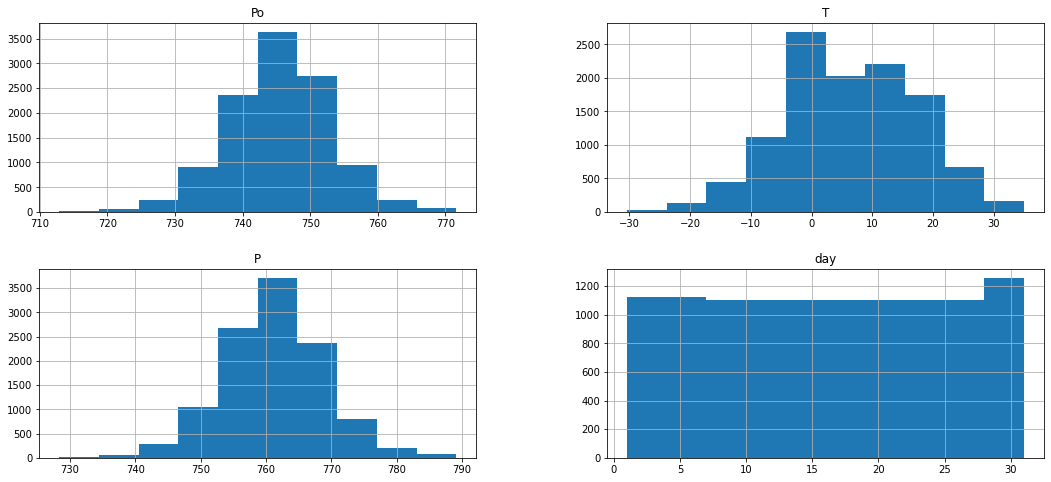

In [245]:
df.hist()

In [247]:
df.describe()

,Po,T,P,day
count,11221.000000,11221.000000,11221.000000,11221.000000
mean,745.453043,6.419526,761.200437,15.680332
std,7.517061,10.800093,7.716423,8.816198
min,712.900000,-30.400000,728.400000,1.000000
25%,740.600000,-1.000000,756.200000,8.000000
50%,745.600000,6.100000,761.200000,16.000000
75%,750.400000,14.600000,766.100000,23.000000
max,771.600000,35.000000,789.100000,31.000000


In [241]:
df["T"].resample('W').mean()

Date
2019-01-06    -6.114583
2019-01-13   -11.836364
2019-01-20    -5.216071
2019-01-27   -14.005357
2019-02-03    -5.812500
                ...    
2022-10-09    10.130357
2022-10-16     5.907143
2022-10-23     4.553571
2022-10-30     3.489286
2022-11-06    -0.400000
Freq: W-SUN, Name: T, Length: 201, dtype: float64

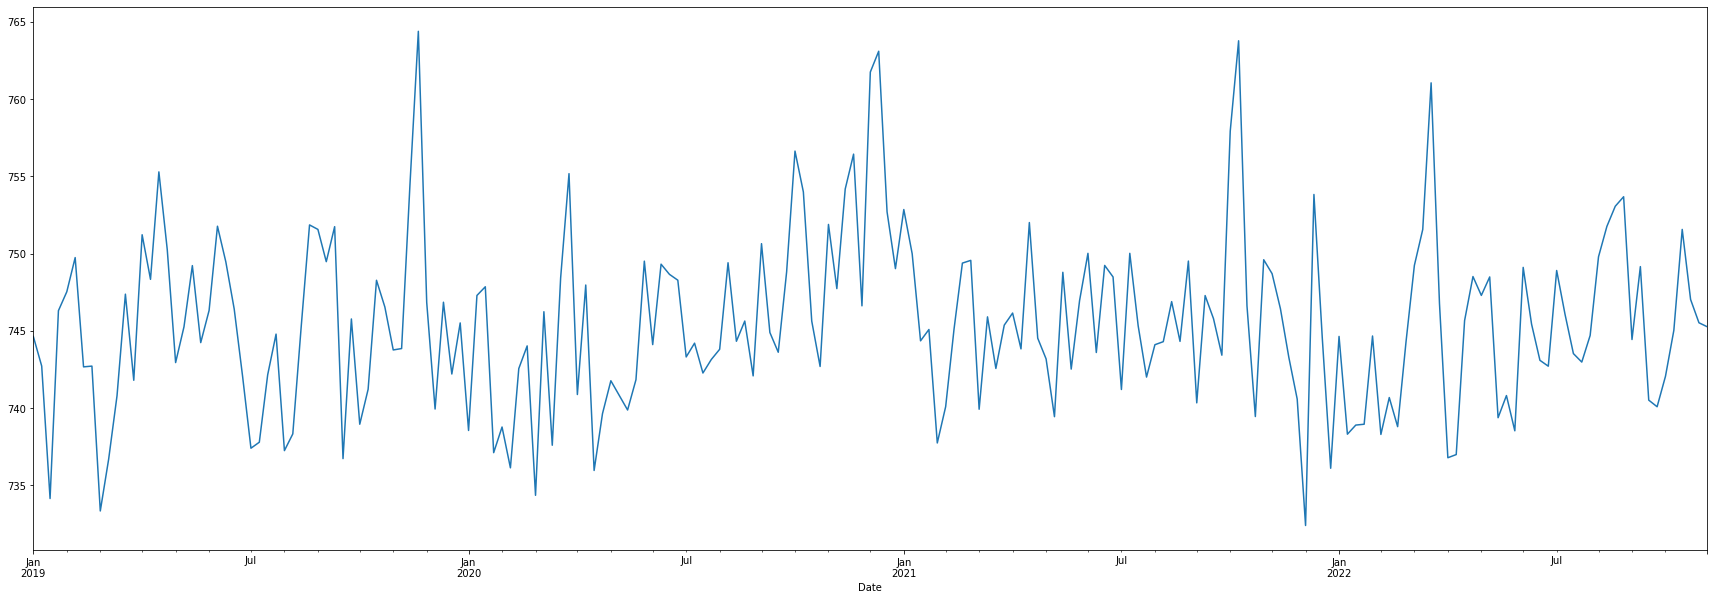

In [273]:
temp_mean = df["Po"].resample("W").mean()
temp_mean.plot(figsize=(30, 10))
plt.show()

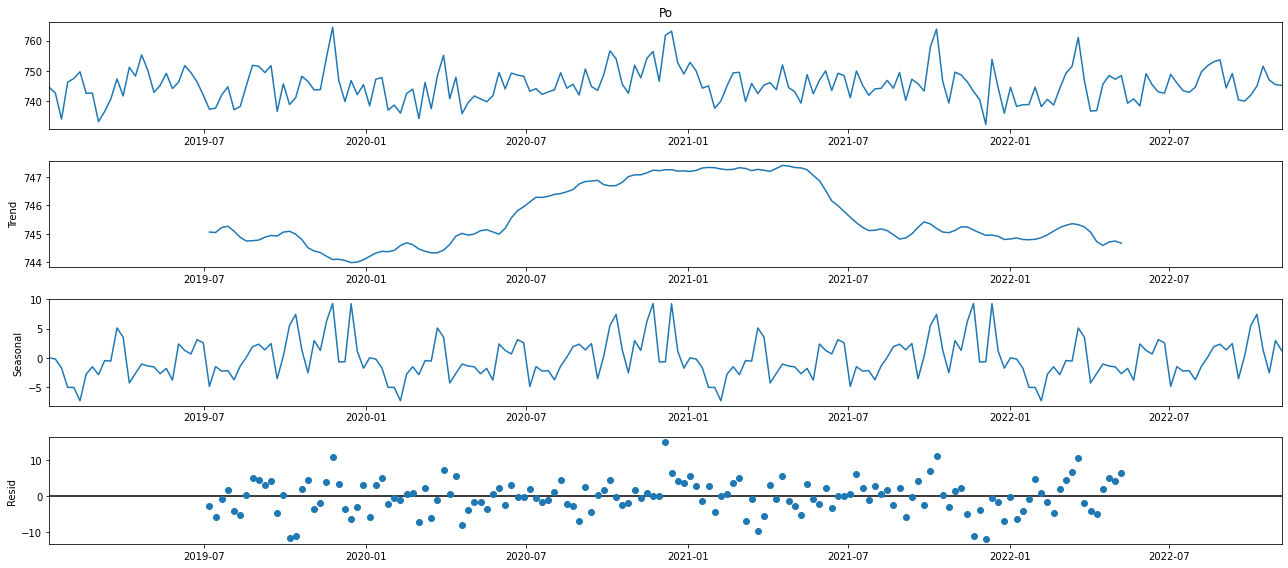

In [274]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(temp_mean, model='additive')
fig = decomposition.plot()
plt.show()

In [275]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

print(adf_test(temp_mean))

Results of Dickey-Fuller Test:
Test Statistic                -9.645960e+00
p-value                        1.477666e-16
#Lags Used                     0.000000e+00
Number of Observations Used    2.000000e+02
Critical Value (1%)           -3.463476e+00
Critical Value (5%)           -2.876102e+00
Critical Value (10%)          -2.574532e+00
dtype: float64
None


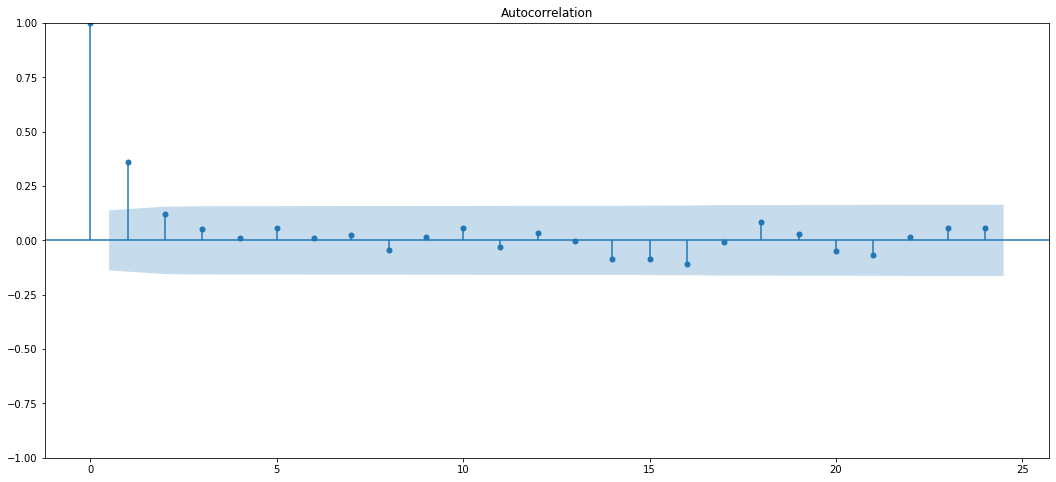

C:\Users\1\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


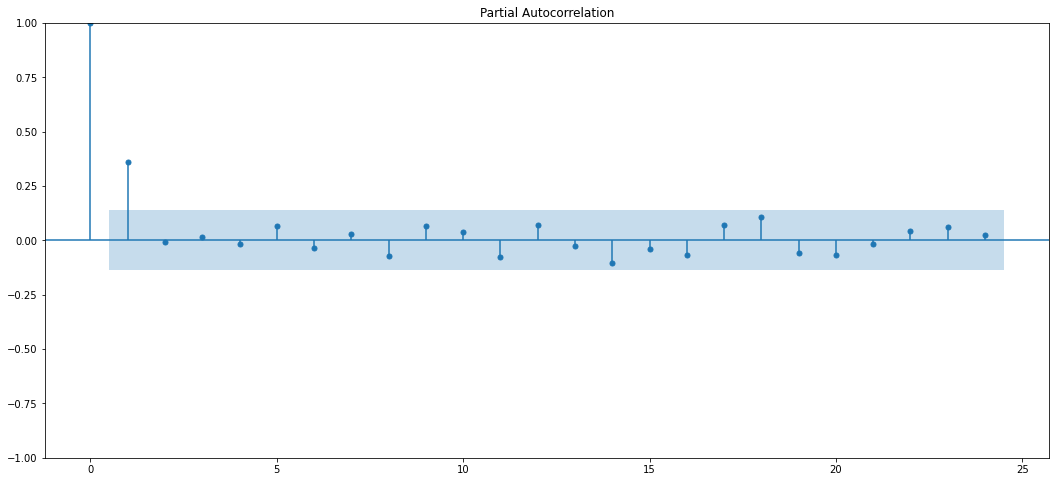

In [276]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(temp_mean)
plt.show()

plot_pacf(temp_mean)
plt.show()

In [285]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(df['Po'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results = model.fit()

C:\Users\1\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\1\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\1\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\1\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so w

<AxesSubplot:xlabel='Date'>

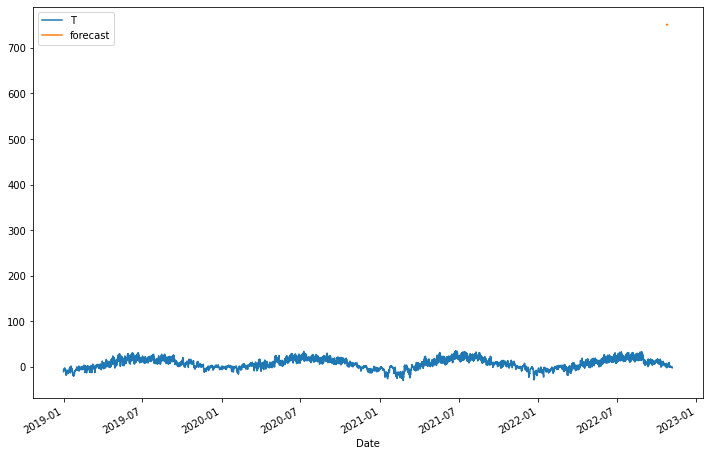

In [282]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['T','forecast']].plot(figsize=(12,8))